In [16]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
from src.feature_engineering import FeatureEngineer


In [17]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')
print(f"Dataset: {df.shape}")

Dataset: (7043, 21)


In [18]:
config = {
    'create_interactions': True,
    'polynomial_degree': 2
}
engineer = FeatureEngineer(config)

In [19]:
df_engineered = engineer.engineer_features(df, fit=True)
print(f"Features created: {df_engineered.shape[1]}")
print(f"New columns: {df_engineered.columns.tolist()}")

Features created: 33
New columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_squared', 'tenure_sqrt', 'tenure_log', 'tenure_group', 'tenure^2', 'SeniorCitizen_zscore', 'tenure_zscore', 'MonthlyCharges_zscore', 'tenure_squared_zscore', 'tenure_sqrt_zscore', 'tenure_log_zscore', 'tenure^2_zscore']


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Drop target & unnecessary identifier columns
X = df_engineered.drop(['Churn', 'customerID'], axis=1, errors='ignore')

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target variable
y = LabelEncoder().fit_transform(df_engineered['Churn'])

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🏆 Top 15 Important Features:")
print(feature_importance.head(15))



🏆 Top 15 Important Features:
                           feature  importance
9            MonthlyCharges_zscore    0.068867
2                   MonthlyCharges    0.066578
11              tenure_sqrt_zscore    0.035893
12               tenure_log_zscore    0.034100
10           tenure_squared_zscore    0.033653
13                 tenure^2_zscore    0.032000
3                   tenure_squared    0.031976
4                      tenure_sqrt    0.027662
6                         tenure^2    0.027463
5                       tenure_log    0.027391
8                    tenure_zscore    0.026436
1                           tenure    0.025533
20     InternetService_Fiber optic    0.021549
38  PaymentMethod_Electronic check    0.019846
36            PaperlessBilling_Yes    0.018196


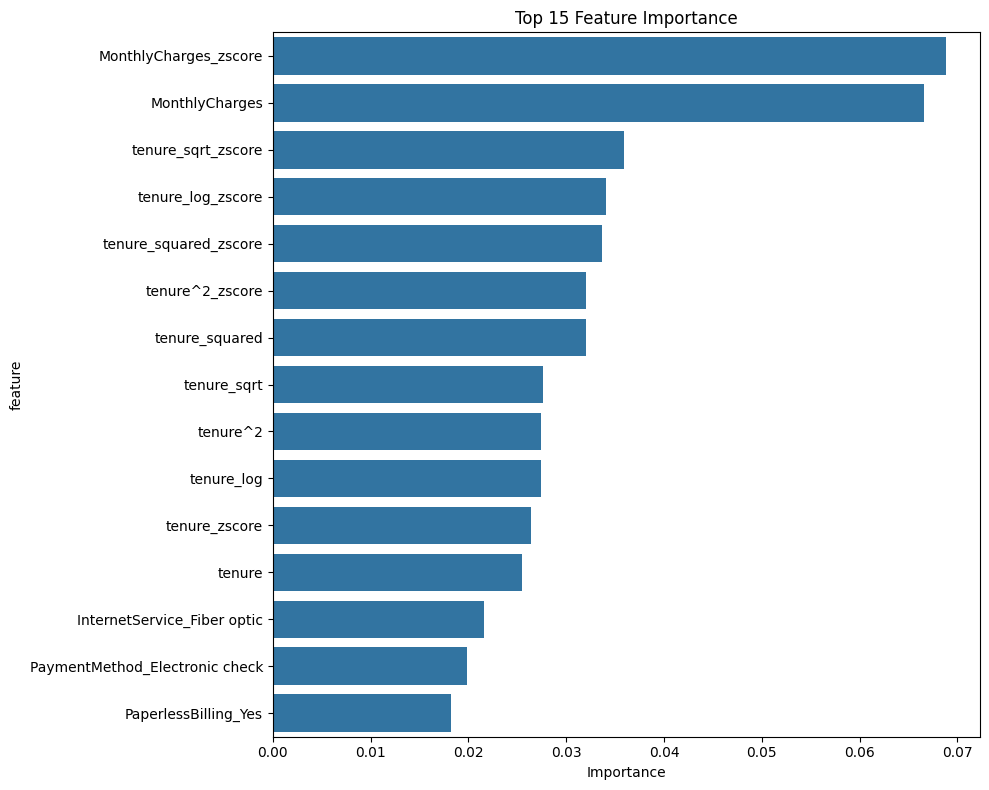

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [22]:
df_engineered.to_csv('../data/processed/churn_engineered.csv', index=False)
print("✅ Engineered data saved!")

✅ Engineered data saved!
